# AL experiment

This notebook runs an active learning experiments with various strategies. Here we solve a classification problem with Random Forest classifier. We simulate a situation where only a few datapoints are available at the beginning and the AL strategy selects which datapoint to add next. Then the label is retreaved from the ground truth and the classifier is retrained and the procedure is repeated for a predefined number of iterations.

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
# for plotting
%matplotlib notebook 
import matplotlib.pyplot as plt

import sys
sys.path.append('./Classes/')
# import various AL strategies
from active_learner import ActiveLearnerRandom
from active_learner import ActiveLearnerUncertainty
from active_learner import ActiveLearnerLAL
# import the dataset class
from dataset import DatasetCheckerboard2x2
from dataset import DatasetCheckerboard4x4
from dataset import DatasetRotatedCheckerboard2x2
from dataset import DatasetStriatumMini
# import the model for LAL strategy
from lal_model import LALmodel
# import Experiment and Result classes that will be responsible for running AL and saving the results
from experiment import Experiment
from results import Results

## Build classifiers for LAL strategies

LALindependent strategy

It takes approximately 10 minutes on a 2013 MacBook Pro to train a regressor

In [ ]:
%%time

fn = 'LAL-randomtree-simulatedunbalanced-big.npz'
# we found these parameters by cross-validating the regressor and now we reuse these expreiments
parameters = {'est': 2000, 'depth': 40, 'feat': 6 }
filename = './lal datasets/'+fn
regression_data = np.load(filename)
regression_features = regression_data['arr_0']
regression_labels = regression_data['arr_1']

print('Building lal regression model..')
lalModel1 = RandomForestRegressor(n_estimators = parameters['est'], max_depth = parameters['depth'], 
                                 max_features=parameters['feat'], oob_score=True, n_jobs=8)

lalModel1.fit(regression_features, np.ravel(regression_labels))    

print('Done!')
print('Oob score = ', lalModel1.oob_score_)

Building lal regression model..


LALiterative strategy

It takes approximately 5 minutes on a 2013 MacBook Pro to train a regressor

In [ ]:
%%time

fn = 'LAL-iterativetree-simulatedunbalanced-big.npz'
# we found these parameters by cross-validating the regressor and now we reuse these expreiments
parameters = {'est': 1000, 'depth': 40, 'feat': 6 }
filename = './lal datasets/'+fn
regression_data = np.load(filename)
regression_features = regression_data['arr_0']
regression_labels = regression_data['arr_1']

print('Building lal regression model..')
lalModel2 = RandomForestRegressor(n_estimators = parameters['est'], max_depth = parameters['depth'], 
                                 max_features=parameters['feat'], oob_score=True, n_jobs=8)

lalModel2.fit(regression_features, np.ravel(regression_labels))    

print('Done!')
print('Oob score = ', lalModel1.oob_score_)

## Running the experiment: checkerboard 2x2

It takes approximately 4 minutes for one experiment

In [ ]:
%%time

# number of experiment repeats
nExperiments = 20
# number of estimators (random trees) in the classifier
nEstimators = 50
# number of labeled points at the beginning of the AL experiment
nStart = 2
# number of iterations in AL experiment
nIterations = 100
# the quality metrics computed on the test set to evaluate active learners
quality_metrics = ['accuracy']

# load dataset
dtst = DatasetCheckerboard2x2()
# set the starting point
dtst.setStartState(nStart)
# Active learning strategies
alR = ActiveLearnerRandom(dtst, nEstimators, 'random')
alU = ActiveLearnerUncertainty(dtst, nEstimators, 'uncertainty')
alLALindepend = ActiveLearnerLAL(dtst, nEstimators, 'lal-rand', lalModel1)
alLALiterative = ActiveLearnerLAL(dtst, nEstimators, 'lal-iter', lalModel2)
als = [alR, alU, alLALindepend, alLALiterative]

exp = Experiment(nIterations, nEstimators, quality_metrics, dtst, als, 'here we can put a comment about the current experiments')
# the Results class helps to add, save and plot results of the experiments
res = Results(exp, nExperiments)

for i in range(nExperiments):
    print('\n experiment #'+str(i+1))
    # run an experiment
    performance = exp.run()
    res.addPerformance(performance)
    # reset the experiment (including sampling a new starting state for the dataset)
    exp.reset()

print()
res.saveResults('checkerboard2x2-exp')

<IPython.core.display.Javascript object>


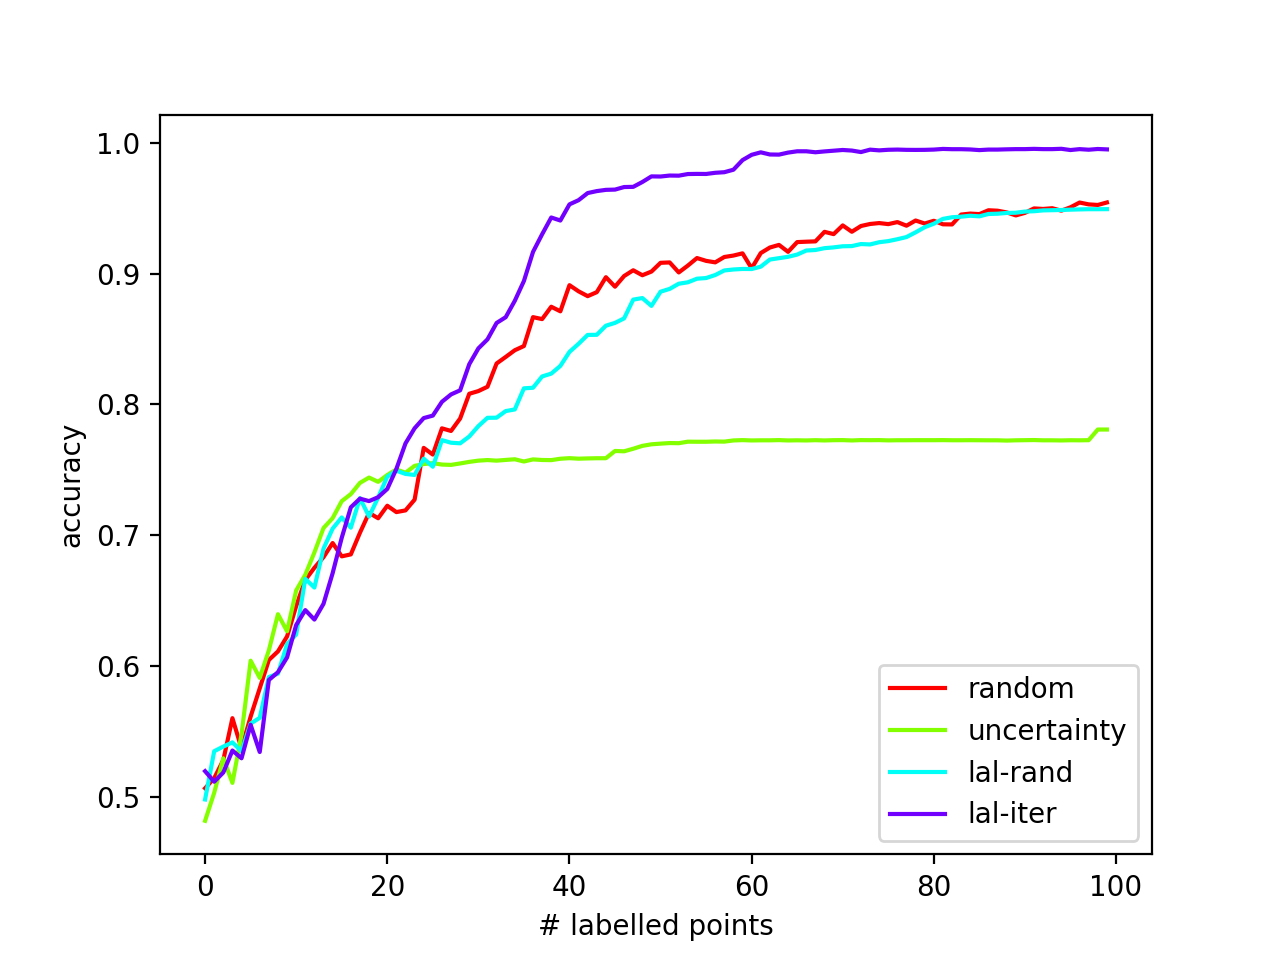

In [12]:
res2plot = Results()
res2plot.readResult('checkerboard2x2-exp')
res2plot.plotResults(metrics = ['accuracy'])

## Running the experiment: checkerboard 4x4

It takes approximately 4 minutes for one experiment

In [ ]:
%%time

# number of experiment repeats
nExperiments = 20
# number of estimators (random trees) in the classifier
nEstimators = 50
# number of labeled points at the beginning of the AL experiment
nStart = 2
# number of iterations in AL experiment
nIterations = 100
# the quality metrics computed on the test set to evaluate active learners
quality_metrics = ['accuracy']

# load dataset
dtst = DatasetCheckerboard4x4()
# other possible datasets: dtst = DatasetCheckerboard4x4(), dtst = DatasetRotatedCheckerboard2x2(), dtst = DatasetStriatumMini()
# set the starting point
dtst.setStartState(nStart)
# Active learning strategies
alR = ActiveLearnerRandom(dtst, nEstimators, 'random')
alU = ActiveLearnerUncertainty(dtst, nEstimators, 'uncertainty')
alLALindepend = ActiveLearnerLAL(dtst, nEstimators, 'lal-rand', lalModel1)
alLALiterative = ActiveLearnerLAL(dtst, nEstimators, 'lal-iter', lalModel2)
als = [alR, alU, alLALindepend, alLALiterative]

exp = Experiment(nIterations, nEstimators, quality_metrics, dtst, als, 'here we can put a comment about the current experiments')
# the Results class helps to add, save and plot results of the experiments
res = Results(exp, nExperiments)

for i in range(nExperiments):
    print('\n experiment #'+str(i+1))
    # run an experiment
    performance = exp.run()
    res.addPerformance(performance)
    # reset the experiment (including sampling a new starting state for the dataset)
    exp.reset()

print()    
res.saveResults('checkerboard4x4-exp')

<IPython.core.display.Javascript object>


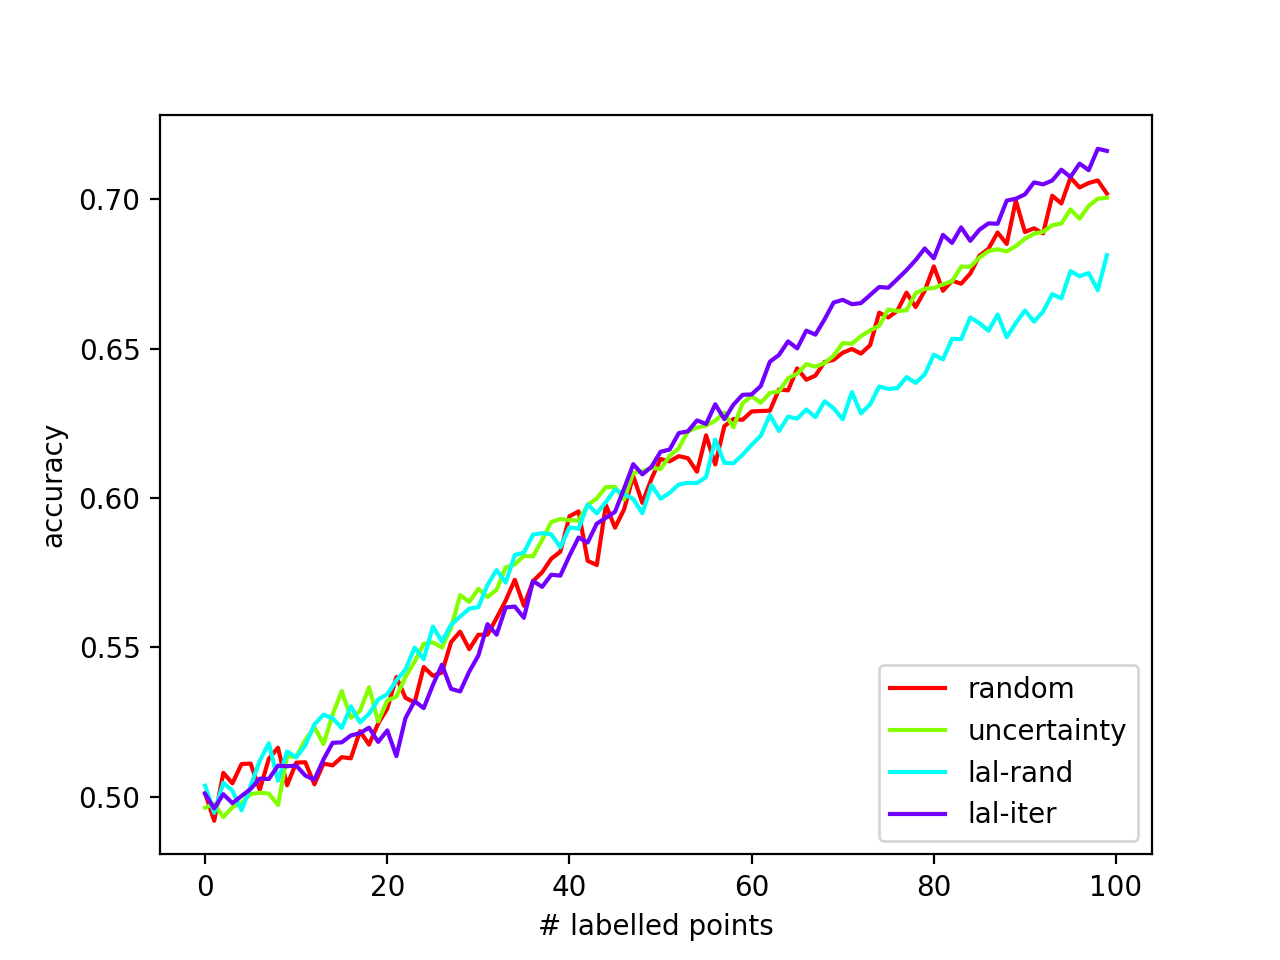

In [13]:
res2plot = Results()
res2plot.readResult('checkerboard4x4-exp')
res2plot.plotResults(metrics = ['accuracy'])

## Running the experiment: rotated checkerboard 2x2

It takes approximately 4 minutes for one experiment

In [ ]:
%%time

# number of experiment repeats
nExperiments = 20
# number of estimators (random trees) in the classifier
nEstimators = 50
# number of labeled points at the beginning of the AL experiment
nStart = 2
# number of iterations in AL experiment
nIterations = 100
# the quality metrics computed on the test set to evaluate active learners
quality_metrics = ['accuracy']

# load dataset
dtst = DatasetRotatedCheckerboard2x2()
# other possible datasets: dtst = DatasetCheckerboard4x4(), dtst = DatasetRotatedCheckerboard2x2(), dtst = DatasetStriatumMini()
# set the starting point
dtst.setStartState(nStart)
# Active learning strategies
alR = ActiveLearnerRandom(dtst, nEstimators, 'random')
alU = ActiveLearnerUncertainty(dtst, nEstimators, 'uncertainty')
alLALindepend = ActiveLearnerLAL(dtst, nEstimators, 'lal-rand', lalModel1)
alLALiterative = ActiveLearnerLAL(dtst, nEstimators, 'lal-iter', lalModel2)
als = [alR, alU, alLALindepend, alLALiterative]

exp = Experiment(nIterations, nEstimators, quality_metrics, dtst, als, 'here we can put a comment about the current experiments')
# the Results class helps to add, save and plot results of the experiments
res = Results(exp, nExperiments)

for i in range(nExperiments):
    print('\n experiment #'+str(i+1))
    # run an experiment
    performance = exp.run()
    res.addPerformance(performance)
    # reset the experiment (including sampling a new starting state for the dataset)
    exp.reset()

print()
res.saveResults('rotated-checkerboard2x2-exp')

<IPython.core.display.Javascript object>


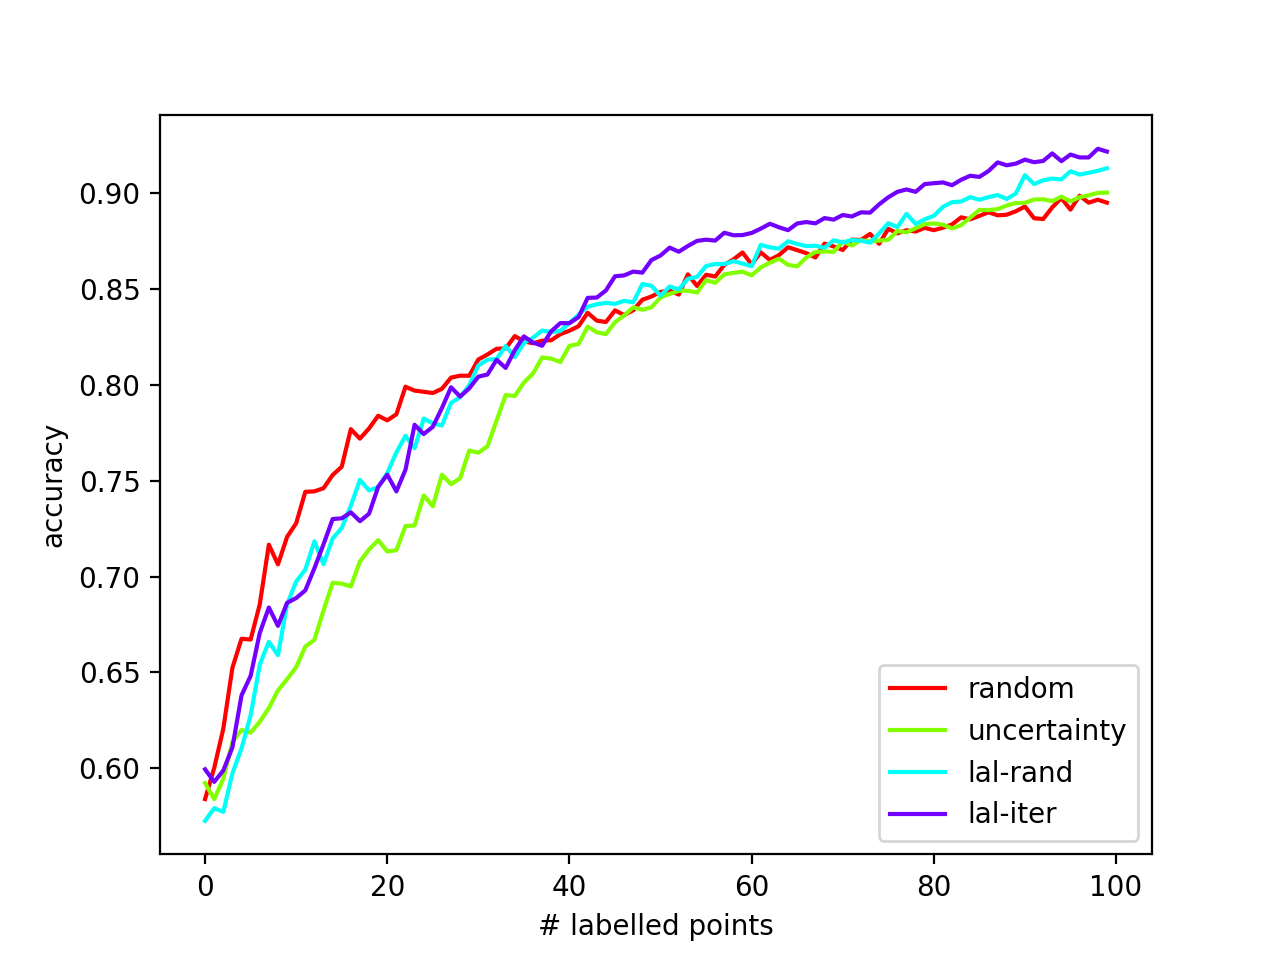

In [14]:
res2plot = Results()
res2plot.readResult('rotated-checkerboard2x2-exp')
res2plot.plotResults(metrics = ['accuracy'])

## Running the experiment: mini striatum dataset

It takes approximately 13 minutes for one experiment

In [ ]:
%%time
# number of experiment repeats
nExperiments = 20
# number of estimators (random trees) in the classifier
nEstimators = 50
# number of labeled points at the beginning of the AL experiment
nStart = 2
# number of iterations in AL experiment
nIterations = 200
# the quality metrics computed on the test set to evaluate active learners
quality_metrics = ['TP', 'TN', 'FP', 'FN']

# load dataset
dtst = DatasetStriatumMini()
# set the starting point
dtst.setStartState(nStart)
# Active learning strategies
alR = ActiveLearnerRandom(dtst, nEstimators, 'random')
alU = ActiveLearnerUncertainty(dtst, nEstimators, 'uncertainty')
alLALindepend = ActiveLearnerLAL(dtst, nEstimators, 'lal-rand', lalModel1)
alLALiterative = ActiveLearnerLAL(dtst, nEstimators, 'lal-iter', lalModel2)
als = [alR, alU, alLALindepend, alLALiterative]

exp = Experiment(nIterations, nEstimators, quality_metrics, dtst, als, 'here we can put a comment about the current experiments')
# the Results class helps to add, save and plot results of the experiments
res = Results(exp, nExperiments)

for i in range(nExperiments):
    print('\n experiment #'+str(i+1))
    # run an experiment
    performance = exp.run()
    res.addPerformance(performance)
    # reset the experiment (including sampling a new starting state for the dataset)
    exp.reset()

print()
res.saveResults('striatum-exp')

<IPython.core.display.Javascript object>


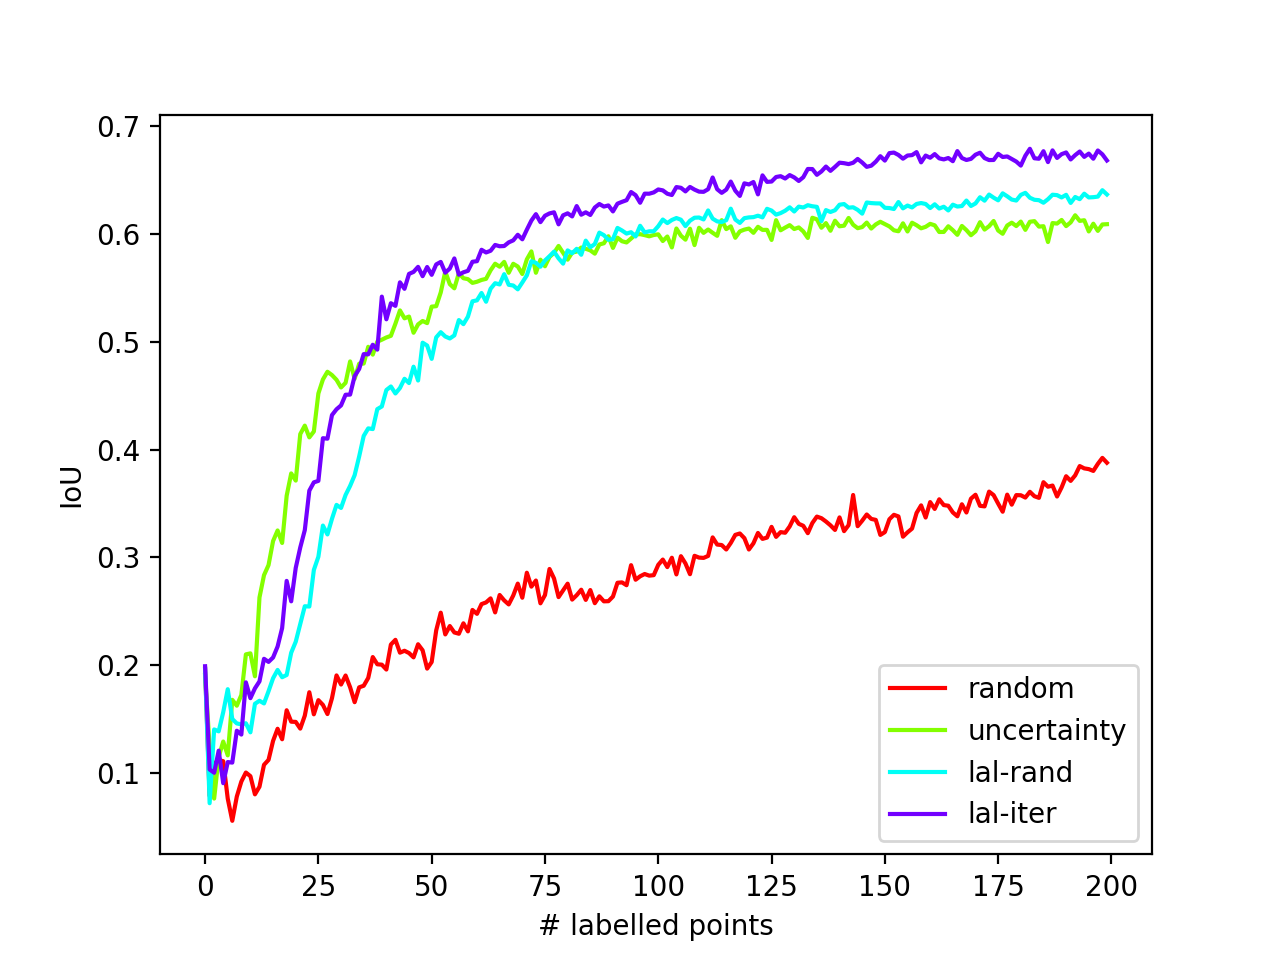

In [15]:
res2plot = Results()
res2plot.readResult('striatum-exp')
res2plot.plotResults(metrics = ['IoU'])